<a href="https://colab.research.google.com/github/sagarbhadra7/Algorithms/blob/master/Clustering_Using_Convex_Hulls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## https://towardsdatascience.com/clustering-using-convex-hulls-fddafeaa963c

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
centers = [[0, 1, 0], [1.5, 1.5, 1], [1, 1, 1]]
stds = [0.13, 0.12, 0.12]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)
point_indices = np.arange(1000)

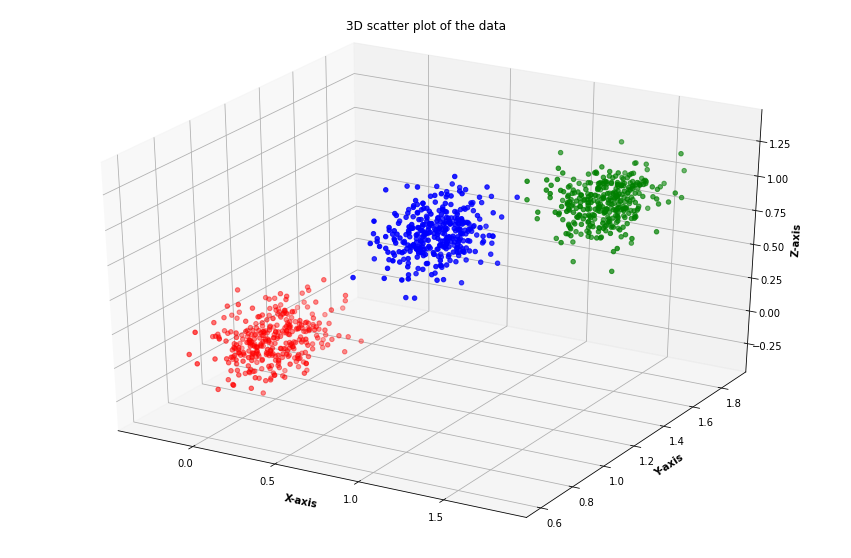

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = X[:,0]
y = X[:,1] 
z = X[:,2]

# Creating figure 
fig = plt.figure(figsize = (15, 10)) 
ax = plt.axes(projection ="3d") 
    
# Add gridlines  
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)  
  
mycolours = ["red", "green", "blue"]
# Creating color map 
col = [mycolours[i] for i in labels_true]
# Creating plot 
sctt = ax.scatter3D(x, y, z, c = col, marker ='o')
plt.title("3D scatter plot of the data\n") 
ax.set_xlabel('X-axis', fontweight ='bold')  
ax.set_ylabel('Y-axis', fontweight ='bold')  
ax.set_zlabel('Z-axis', fontweight ='bold')
  
# show plot 
plt.draw()


In [3]:
from sklearn.model_selection import train_test_split
X_seeds, X_rest, y_seeds, y_rest, id_seeds, id_rest = train_test_split(X, labels_true, point_indices, test_size=0.33, random_state=42)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=9).fit(X_seeds)
initial_result = kmeans.labels_
print(initial_result)

[0 1 1 0 0 1 1 2 2 0 2 1 0 0 1 0 1 0 0 2 1 2 0 2 0 0 0 0 0 1 1 2 1 2 2 0 1
 2 1 2 0 0 0 0 2 0 2 1 2 2 1 1 0 1 1 0 1 1 1 2 0 0 1 0 0 1 2 2 2 1 1 0 1 0
 2 2 2 2 1 1 2 1 0 2 0 2 0 1 1 2 0 1 0 2 0 2 1 0 1 0 0 2 0 0 2 1 0 2 1 0 0
 2 0 1 2 2 1 0 1 2 1 1 2 0 0 0 0 0 2 2 1 1 1 2 2 2 1 0 0 1 0 0 0 1 2 2 2 1
 2 1 1 0 2 2 0 2 2 0 1 2 1 1 1 1 2 2 1 1 0 2 2 2 1 1 2 0 2 1 2 0 1 1 0 0 0
 1 2 2 1 0 2 1 0 1 2 2 0 1 1 0 2 2 1 2 1 0 1 0 2 2 0 0 1 1 0 0 1 1 2 0 0 0
 0 1 0 0 1 2 1 2 1 1 2 1 2 1 2 0 2 1 1 0 0 2 1 2 0 1 2 0 0 0 0 2 0 1 2 2 0
 2 2 1 0 0 1 0 2 1 1 2 0 2 0 2 1 0 0 1 0 2 1 1 1 0 0 0 0 2 2 2 0 1 0 1 0 2
 2 2 1 1 0 2 2 2 2 2 2 1 1 2 2 0 1 0 2 1 2 2 1 1 0 0 2 2 1 1 1 0 0 1 1 0 1
 1 1 1 2 1 0 0 2 0 2 0 2 0 2 0 1 0 2 1 2 2 1 1 2 1 2 0 2 1 0 0 2 2 1 0 1 0
 2 1 1 1 2 0 2 0 1 2 0 0 2 1 0 2 2 0 0 2 2 2 0 1 1 1 1 2 0 2 1 1 1 0 1 0 0
 2 2 2 0 2 1 0 1 2 2 2 0 1 2 2 0 2 0 1 1 1 1 1 0 1 2 2 2 0 0 1 2 1 1 1 0 2
 0 2 0 0 2 0 2 2 1 2 2 0 1 0 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 2
 2 2 0 0 1 2 0 0 2 1 0 2 

In [6]:
from itertools import permutations
# Source: https://stackoverflow.com/questions/11683785/how-can-i-match-up-cluster-labels-to-my-ground-truth-labels-in-matlab
def remap_labels(pred_labels, true_labels):
    pred_labels, true_labels = np.array(pred_labels), np.array(true_labels)
    assert pred_labels.ndim == 1 == true_labels.ndim
    assert len(pred_labels) == len(true_labels)
    cluster_names = np.unique(pred_labels)
    accuracy = 0
    perms = np.array(list(permutations(np.unique(true_labels))))
    remapped_labels = true_labels
    for perm in perms:
        flipped_labels = np.zeros(len(true_labels))
        for label_index, label in enumerate(cluster_names):
            flipped_labels[pred_labels == label] = perm[label_index]
        testAcc = np.sum(flipped_labels == true_labels) / len(true_labels)
        if testAcc > accuracy:
            accuracy = testAcc
            remapped_labels = flipped_labels
    return accuracy, remapped_labels

In [7]:
intial_accuracy, remapped_initial_result = remap_labels(initial_result, y_seeds)

In [8]:
# Get the idices of the data points belonging to each cluster
indices = {}
for i in range(len(id_seeds)):
    if int(remapped_initial_result[i]) not in indices:
        indices[int(remapped_initial_result[i])] = [i]
    else:
        indices[int(remapped_initial_result[i])].append(i)

In [9]:
from scipy.spatial import ConvexHull
# Get convex hulls for each cluster
hulls = {}
for i in indices:
    hull = ConvexHull(X_seeds[indices[i]])
    hulls[i] = hull

In [11]:
!pip install quadprog

  Created wheel for quadprog: filename=quadprog-0.1.7-cp36-cp36m-linux_x86_64.whl size=299415 sha256=92b50a71e8c40005a4f23ac9e6b969bc9021de092201af597bdaf9ded3cf354f
  Stored in directory: /root/.cache/pip/wheels/36/dd/b1/849989444c0a5930927b260663019b7da6cff864fc224c2747
Successfully built quadprog


In [12]:
from quadprog import solve_qp
# Source: https://stackoverflow.com/questions/42248202/find-the-projection-of-a-point-on-the-convex-hull-with-scipy
def proj2hull(z, equations):
    G = np.eye(len(z), dtype=float)
    a = np.array(z, dtype=float)
    C = np.array(-equations[:, :-1], dtype=float)
    b = np.array(equations[:, -1], dtype=float)
    x, f, xu, itr, lag, act = solve_qp(G, a, C.T, b, meq=0, factorized=True)
    return x

In [13]:
prediction = []
for z1 in X_rest:
    min_cluster_distance = 100000
    min_distance_point = ""
    min_cluster_distance_hull = ""
    
    for i in indices:
        p = proj2hull(z1, hulls[i].equations)
        dist = np.linalg.norm(z1-p)
        if dist < min_cluster_distance:
            min_cluster_distance = dist
            min_distance_point = p
            min_cluster_distance_hull = i
    prediction.append(min_cluster_distance_hull)
prediction = np.array(prediction)

In [14]:
from sklearn.metrics import accuracy_score
Y_pred = np.concatenate((remapped_initial_result, prediction))
Y_real = np.concatenate((y_seeds, y_rest))
print(accuracy_score(Y_real, Y_pred))

1.0
